In [46]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numdifftools as nd
import pandas as pd
import respy as rp
import numpy as np
from estimagic.optimization.optimize import maximize

from calibration_maximum_likelihood import run_bootstrap

params_base, options_base, df = rp.get_example_model("robinson", with_data=True)

params_base["lower"] = [0.9, 0.00, -0.20, 1.00, 0.0050, 0.001, -0.4]
params_base["upper"] = [1.0, 0.10,  0.00, 1.10, 0.0150, 0.030, +0.4]

# We will use estimagic and fix all parameters at their true values.
constr_base = [
#    {"loc": ("shocks_sdcorr", "sd_hammock"), "type": "sdcorr"}, 
    {"loc": ("delta", "delta"), "type": "fixed"}, 
    {"loc": ("shocks_sdcorr", "sd_fishing"), "type": "fixed"}, 
    {"loc": ("shocks_sdcorr", "corr_hammock_fishing"), "type": "fixed"}, 
    {"loc": "wage_fishing", "type": "fixed"},
    {"loc": "nonpec_fishing", "type": "fixed"},
    {"loc": "nonpec_hammock", "type": "fixed"}
]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
params_base, options_base, df = rp.get_example_model("robinson", with_data=True)

In [51]:
crit_func = rp.get_crit_func(params_base, options_base, df)

params_start = params_base.copy()
params_start.loc[("shocks_sdcorr", "sd_hammock"), "value"] = -0.5

results, params_rslt = maximize(
                    crit_func, params_start, 
                    "nlopt_bobyqa", 
                    algo_options={"maxeval": 10}, 
                    constraints=constr_base, 
        )

In [ ]:
results, params_rslt

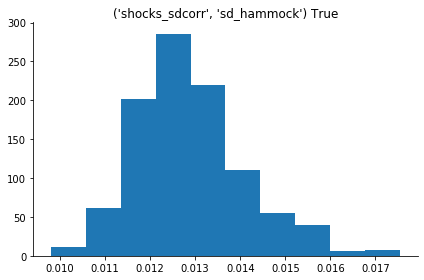

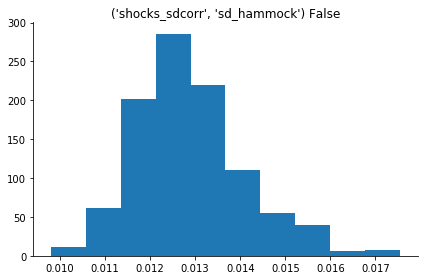

In [23]:
for i, index in enumerate([("shocks_sdcorr", "sd_hammock")]):
    
    for is_perturb in [True, False]:

        fname = f"bootstrap.{index[1]}_perturb_{str(is_perturb).lower()}.pkl"
        boot_params = pd.read_pickle(fname)

        fig, ax = plt.subplots()

        ax.hist(boot_params.loc[index, :])
        ax.set_title(f"{index} {is_perturb}")

        plt.show()

In [25]:
boot_params.loc[("shocks_sdcorr", "sd_hammock")].mean()

0.012890647124466774